# Pytorch与科学计算

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
import torch.optim as optim
import argparse

### 基本方法

In [2]:
# 如何判断一个对象是否为Tensor张量
obj = np.arange(1,10)
print(torch.is_tensor(obj))

False


In [3]:
obj1 = torch.Tensor(10)
print(torch.is_tensor(obj1))

True


In [4]:
# 如何全局设置Tensor数据类型？
torch.set_default_tensor_type(torch.DoubleTensor)
print(torch.Tensor(2).dtype)

torch.float64


In [5]:
# 如何判断一个对象是否为Pytorch Storage对象
# torch.Storage is a contiguous, one-dimensional array of a single data type
print(torch.is_storage(obj))
storage = torch.DoubleStorage(10)
print(torch.is_storage(storage))

False
True


In [6]:
# 如何获取Tensor中元素的个数
a = torch.Tensor(3, 4)
print(torch.numel(a))

12


In [7]:
# 如何设置打印选项？
# precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None
torch.set_printoptions(precision=5, threshold=100, linewidth=100, edgeitems=4)
print(torch.DoubleTensor(10, 4))

tensor([[         nan, 1.98120e-321, 3.58501e-316, 6.94312e-310],
        [5.43472e-323, 6.94299e-310, 6.94299e-310, 3.70549e-322],
        [ 0.00000e+00,          nan, 6.94299e-310, 6.94296e-310],
        [6.94299e-310, 5.88531e-320, 2.96439e-323, 6.94299e-310],
        [6.94299e-310, 4.94066e-324,  0.00000e+00,          nan],
        [6.94299e-310,  0.00000e+00, 5.92484e-320, 5.43472e-323],
        [6.94299e-310, 6.94299e-310, 3.75490e-322,  0.00000e+00],
        [         nan, 6.94299e-310, 6.94296e-310, 6.94299e-310],
        [5.96041e-320, 2.96439e-323, 6.94299e-310, 6.94299e-310],
        [4.94066e-324,  0.00000e+00,          nan, 6.94299e-310]])


In [8]:
# 如何创建单位矩阵
torch.eye(3, 3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [9]:
# 如何从numpy多维数组创建Tensor张量
ta = np.arange(1, 20, 2)
print(torch.from_numpy(ta))
b = np.ndarray((2, 3))
print(torch.from_numpy(b))

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])
tensor([[3.60753e-316,  0.00000e+00, 2.12200e-314],
        [ 4.09311e+93, 5.48798e+247, 2.97504e+228]])


In [10]:
# 如何创建等差数列
# start / end / step
print(torch.linspace(1, 9, 5, requires_grad=True))

tensor([1., 3., 5., 7., 9.], requires_grad=True)


In [11]:
# 和linspace类似的logspace
print(torch.logspace(1, 5, 5, requires_grad=True))

tensor([1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04, 1.00000e+05], requires_grad=True)


In [12]:
# 如何创建元素全部为1的矩阵
print(torch.ones(2, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [13]:
# 如何创建0,1均匀的随机矩阵，形状可以指定
print(torch.rand(2, 3))

tensor([[0.61933, 0.33088, 0.14240],
        [0.22942, 0.95433, 0.07148]])


In [14]:
# 如何创建标准正太分布随机矩阵？形状可以指定
print(torch.randn(2, 3))

tensor([[ 1.10735, -0.77052, -0.68622],
        [-0.84563,  0.37656,  0.10483]])


In [15]:
# 如何创建随机整数序列，如同numpy.random.permutation?
print(np.random.permutation(10))
print(torch.randperm(10))

[9 4 7 0 8 1 5 2 6 3]
tensor([8, 9, 7, 1, 3, 6, 5, 2, 0, 4])


In [16]:
# 如何创建一个列表如同numpy中的arange?
print(np.arange(1, 10, 3))
print(torch.arange(1, 10, 3))

[1 4 7]
tensor([1, 4, 7])


In [17]:
# 如何创建一个全0的矩阵？
print(torch.zeros(2, 2))

tensor([[0., 0.],
        [0., 0.]])


### 索引、切片、拼接及换位方法

In [18]:
# 如何将多个Tensor按照某一维度拼接起来？
# torch.cat通过关键字参数dim指定按哪个维度拼接
tensor = torch.ones(2, 3)
print(torch.cat([tensor, tensor]))
print(torch.cat([tensor, tensor, tensor], dim=1))
# stack方法也可以进行tensor的拼接
print(torch.stack([tensor, tensor], dim=2))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])


In [19]:
# 如何将一个Tensor按照指定维度切片成n个分片？
# 按照第二维度将tensor切分为5个tensor
x = torch.ones(2, 10)
print(torch.chunk(x, 5, dim=1))

(tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]))


In [20]:
# 如何按照索引进行元素的聚合？
# 如何将元素33,66,88,99聚合在一起?
# 第一个参数是源tensor,第二个参数为维度，第三个参数为索引
x = torch.Tensor([[33, 66, 9], [1, 99, 88]])
torch.gather(x, 1, torch.LongTensor([[0, 1], [2, 1]]))
# torch.gather(x, 0, torch.LongTensor([[0, 1, 1], [1, 0, 0]]))

tensor([[33., 66.],
        [88., 99.]])

In [21]:
# 如何按照索引选择目标数据？
# 如何取出第2、4、6列数据，返回新的tensor
x = torch.randn(2, 7)
print(x)
# 第一个参数为源tensor,第二个参数为维度，第三个参数为该维度上的索引
y = torch.index_select(x, 1, torch.LongTensor([1, 3, 5]))
print(y)
z = torch.index_select(x, 0, torch.LongTensor([1]))
print(z)

tensor([[-0.84111, -0.39753, -0.10181, -0.87226, -0.09474,  0.36593,  0.79511],
        [ 0.08496,  0.67426,  0.26090,  1.46092,  0.17352,  1.09947,  0.42727]])
tensor([[-0.39753, -0.87226,  0.36593],
        [ 0.67426,  1.46092,  1.09947]])
tensor([[0.08496, 0.67426, 0.26090, 1.46092, 0.17352, 1.09947, 0.42727]])


In [22]:
# 如何选出满足条件的所有元素
# masked_select方法，返回mask标志为1的所有元素组成的1维Tensor
x = torch.rand(2, 4)
print(x)
# 判断元素是否大于0.5， 大于0.5为1， 小于或等于0.5的为0
mask = x.ge(0.5)
# mask = x.le(0.5)
print(mask)
torch.masked_select(x, mask)

tensor([[0.34463, 0.83414, 0.39324, 0.93638],
        [0.47847, 0.44576, 0.92530, 0.87828]])
tensor([[False,  True, False,  True],
        [False, False,  True,  True]])


tensor([0.83414, 0.93638, 0.92530, 0.87828])

In [23]:
# 如何找出矩阵中非零元素的索引？
# nonzero方法返回非零的索引，结果tensor为二维tensor，行数等于源tensor中非零元素个数，列数等于源tensor的维度(索引)
x = torch.Tensor([[[0.0, 11], [66, 88]], [[22, 33], [0.0, 0.1]]])
print(x)
torch.nonzero(x)

tensor([[[ 0.00000, 11.00000],
         [66.00000, 88.00000]],

        [[22.00000, 33.00000],
         [ 0.00000,  0.10000]]])


tensor([[0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 1]])

In [24]:
# 如何将输入张量分割成相同形状的chunks?
x = torch.ones(2, 10)
print(x)
# 每个块有5个元素，dim表示按第二维度
print(torch.split(x, 5, dim=1))
# 也可指定一个划分列表，依次表示有1,2,3,4个长度
print(torch.split(x, [1, 2, 3, 4], dim=1))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
(tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))
(tensor([[1.],
        [1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]))


In [25]:
# 如何给矩阵增加维度
x = torch.Tensor([1, 2, 3, 4, 5, 6])
# dim关键字参数指定在第几维度增加`[]`
y = x.unsqueeze(dim=0)
print(y)
z = x.unsqueeze(dim=1)
print(z)
print(torch.unsqueeze(x, dim=0))

tensor([[1., 2., 3., 4., 5., 6.]])
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[1., 2., 3., 4., 5., 6.]])


In [26]:
# 如何去掉`[]`降低维度？去维度为1的
x = torch.Tensor([[[0, 2, 3, 4], [22, 33, 44, 55]]])
print(x, x.shape)
y = torch.squeeze(x, dim=0)
print(y, y.shape)
z = x.squeeze(dim=0)
print(z, z.shape)

tensor([[[ 0.,  2.,  3.,  4.],
         [22., 33., 44., 55.]]]) torch.Size([1, 2, 4])
tensor([[ 0.,  2.,  3.,  4.],
        [22., 33., 44., 55.]]) torch.Size([2, 4])
tensor([[ 0.,  2.,  3.,  4.],
        [22., 33., 44., 55.]]) torch.Size([2, 4])


In [27]:
# 如何实现tensor维度之间的转置
# tensor自身的t和transpose方法跟torch上的t和transpose方法功能类似
x = torch.randn(2, 1)
print(x, x.shape)
y = torch.t(x)
print(y, y.shape)
z = torch.transpose(x, 1, 0)
print(z, z.shape)
print(x.t())
print(x.transpose(1, 0))

tensor([[ 1.21101],
        [-0.56873]]) torch.Size([2, 1])
tensor([[ 1.21101, -0.56873]]) torch.Size([1, 2])
tensor([[ 1.21101, -0.56873]]) torch.Size([1, 2])
tensor([[ 1.21101, -0.56873]])
tensor([[ 1.21101, -0.56873]])


In [28]:
# 如何获取沿着某个维度切片后所有的切片
# unbind删除某一维度之后，返回所有切片组成的元组列表
x = torch.rand(2, 2, 2)
print(x)
print(torch.unbind(x, dim=1))

tensor([[[0.97537, 0.73018],
         [0.34044, 0.98740]],

        [[0.99114, 0.66789],
         [0.17070, 0.74846]]])
(tensor([[0.97537, 0.73018],
        [0.99114, 0.66789]]), tensor([[0.34044, 0.98740],
        [0.17070, 0.74846]]))


### 随机抽样

In [29]:
# 手动设置随机种子
torch.manual_seed(123)
seed = torch.initial_seed()
print("seed: {}".format(seed))
# 返回随机生成器状态
state = torch.get_rng_state()
print("state: {}".format(state), len(state))

seed: 123
state: tensor([123,   0,   0,   0,  ...,   0,   0,   0,   0], dtype=torch.uint8) 5056


In [30]:
# 伯努利分布，结果只有0和1，第一个参数是概率p, 并且0<=p<=1
torch.manual_seed(123)
a = torch.rand(3, 3)
print(a)
b = torch.bernoulli(a)
print(b)

tensor([[0.36890, 0.01337, 0.59178],
        [0.09264, 0.47245, 0.52203],
        [0.60508, 0.53130, 0.94855]])
tensor([[1., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.]])


In [31]:
# torch.multinomial的第一个参数为多项式权重，可以是向量，也可以是矩阵，由权重决定对“下标”的抽样
# 为向量：replacement表示是否有放回的抽样，如果为True，结果行数为1，列数有num_samples指定；否则行数为1，列数<=权重weights长度
weights1 = torch.Tensor([20, 10, 3, 2])
a = torch.multinomial(weights1, num_samples=3, replacement=False)
b = torch.multinomial(weights1, num_samples=10, replacement=True)
# c = torch.multinomial(weights1, num_samples=5) !!!默认是不放回抽样，所以num_samples应该<=weights长度
print(a)
print(b)
# print(c)
# 为矩阵：replacement表示是否有放回的抽样，如果为True，结果行数为weights行数，列数由num_samples指定; 
# 否则行数为weights行数，列数<=权重weights每一行长度
weights2 = torch.Tensor([[20, 10, 3, 2], [30, 4, 5, 60]])
c = torch.multinomial(weights2, num_samples=15, replacement=True)
d = torch.multinomial(weights2, num_samples=4, replacement=False)
print(c)
print(d)

tensor([0, 1, 3])
tensor([1, 0, 0, 0, 3, 0, 0, 0, 1, 0])
tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0],
        [3, 3, 0, 0, 2, 0, 0, 3, 3, 0, 1, 3, 2, 3, 3]])
tensor([[0, 1, 3, 2],
        [3, 2, 0, 1]])


tensor([0.48034, 0.44650, 0.56860, 0.57181,  ..., 0.35206, 1.26491, 1.48555, 2.14253]) torch.Size([9000])
tensor([0.00936, 0.29426, 0.80918, 1.27463, 0.18718, 1.13891, 0.50415, 1.32652, 0.71879]) torch.Size([9])
tensor([ 0.11960,  0.52833, -0.29105,  0.60408,  1.43937,  0.51561,  1.04438,  0.85068,  0.45567]) torch.Size([9])


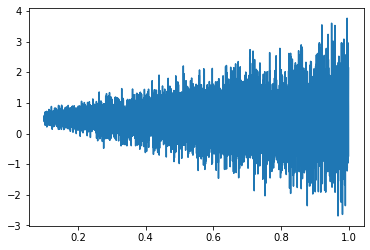

In [32]:
# 从正太分布中抽取随机数
# 均值为0.5，方差为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
x = torch.normal(mean=0.5, std=torch.arange(0.1, 1, 0.0001))
print(x, x.size())
# 均值为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]，方差为0.5
y = torch.normal(mean=torch.arange(0.1, 1, 0.1), std=0.5)
print(y, y.size())
# 均值为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
# 方差为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
z = torch.normal(mean=torch.arange(0.1, 1, 0.1), std=torch.arange(0.1, 1, 0.1))
print(z, z.size())
plt.plot(torch.arange(0.1, 1, 0.0001).data.numpy(), x.data.numpy())
plt.show()

### 序列化与反序列化

In [33]:
# 序列化模型
x = torch.randn(2, 3)
# 序列化torch.save方法
torch.save(x, "randn")
# 反序列化torch.load方法
x_load = torch.load("randn")
print(x)
print(x_load)

tensor([[-1.11380,  1.04912,  0.25141],
        [-0.54102,  1.24743, -0.68706]])
tensor([[-1.11380,  1.04912,  0.25141],
        [-0.54102,  1.24743, -0.68706]])


### 高并发

In [34]:
# PyTorch默认并发数等于计算机内核个数
threads = torch.get_num_threads()
print(threads)
# 可通过set_num_threads方法设置并发数
torch.set_num_threads(4)
threads_1 = torch.get_num_threads()
print(threads_1)
torch.set_num_threads(8)

8
4


## 元素级别的数学运算

In [35]:
# 求元素绝对值
a = torch.Tensor([-1, -0.5, -0.123, 0.4, 0.5, 0.99])
print(torch.abs(a))
# 每个元素加“n”
print(torch.add(a, 3))
# 余弦
print(torch.cos(a))
# 反余弦
print(torch.acos(a))

tensor([1.00000, 0.50000, 0.12300, 0.40000, 0.50000, 0.99000])
tensor([2.00000, 2.50000, 2.87700, 3.40000, 3.50000, 3.99000])
tensor([0.54030, 0.87758, 0.99245, 0.92106, 0.87758, 0.54869])
tensor([3.14159, 2.09440, 1.69411, 1.15928, 1.04720, 0.14154])


In [36]:
# tensor相除再相加:a+0.1*tensor_a/tensor_b,返回新的结果; 需要注意的是a元素个数需要等于tensor_a/tensor_b元素个数
x = torch.addcdiv(a, 0.1, torch.Tensor([4, 9, 4, 6, 7, 3]), torch.Tensor([2, 1, 2, 3, 7, 1]))
print(x)
# tensor相乘再相加:a+0.1*tensor_a*tensor_b,返回新的tensor; 需要注意的是a元素个数需要等于tensor_a*tensor_b元素个数
y = torch.addcmul(a, 0.1, torch.Tensor([4, 9, 4, 6, 7, 3]), torch.Tensor([2, 1, 2, 3, 7, 1]))
print(y)

tensor([-0.80000,  0.40000,  0.07700,  0.60000,  0.60000,  1.29000])
tensor([-0.20000,  0.40000,  0.67700,  2.20000,  5.40000,  1.29000])


<ipython-input-36-b040d5b66a8a>:2: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  x = torch.addcdiv(a, 0.1, torch.Tensor([4, 9, 4, 6, 7, 3]), torch.Tensor([2, 1, 2, 3, 7, 1]))


In [37]:
# 向上取整
x = torch.Tensor([[-9.12, -1.9, -8, -0.3, 1.51], [1.2, 3.8, 4.01, 8.88, -7.6]])
print(torch.ceil(x))
# 向下取整
print(torch.floor(x))
# 夹逼函数，将每个元素限制在给定区间范围内,小于范围下限的被强制设置为下限值；大于上限的被强制设置为上限值
print(torch.clamp(x, -5.5, 5.5))
# 乘法
print(torch.mul(x, 0.1))
# 取相反数
print(torch.neg(x))
# 取倒数
print(torch.reciprocal(x))
# 取平方根倒数：每个元素的平方根倒数
print(torch.rsqrt(x[x>0]))
# 求平方根
print(torch.sqrt(torch.Tensor([4, 16])))

tensor([[-9., -1., -8., -0.,  2.],
        [ 2.,  4.,  5.,  9., -7.]])
tensor([[-10.,  -2.,  -8.,  -1.,   1.],
        [  1.,   3.,   4.,   8.,  -8.]])
tensor([[-5.50000, -1.90000, -5.50000, -0.30000,  1.51000],
        [ 1.20000,  3.80000,  4.01000,  5.50000, -5.50000]])
tensor([[-0.91200, -0.19000, -0.80000, -0.03000,  0.15100],
        [ 0.12000,  0.38000,  0.40100,  0.88800, -0.76000]])
tensor([[ 9.12000,  1.90000,  8.00000,  0.30000, -1.51000],
        [-1.20000, -3.80000, -4.01000, -8.88000,  7.60000]])
tensor([[-0.10965, -0.52632, -0.12500, -3.33333,  0.66225],
        [ 0.83333,  0.26316,  0.24938,  0.11261, -0.13158]])
tensor([0.81379, 0.91287, 0.51299, 0.49938, 0.33558])
tensor([2., 4.])


In [38]:
# 除法
x = torch.Tensor([4, 9])
y = torch.div(x, 3)
print(y)
z = torch.div(x, y)
print(z)
# 计算除法余数的fmod和remainder方法,相当于python中的"%"算子
q = torch.Tensor([2.1, 2.3, 5, 6, 7])
print(torch.fmod(q, 2))
print(torch.remainder(q, 2))
# 返回浮点数的小数部分
print(torch.frac(q))
# 四舍五入
print(torch.round(y))
# 指数运算
print(torch.exp(torch.Tensor([0, math.log(2)])))

tensor([1.33333, 3.00000])
tensor([3., 3.])
tensor([0.10000, 0.30000, 1.00000, 0.00000, 1.00000])
tensor([0.10000, 0.30000, 1.00000, 0.00000, 1.00000])
tensor([0.10000, 0.30000, 0.00000, 0.00000, 0.00000])
tensor([1., 3.])
tensor([1., 2.])


In [39]:
# 自然对数
x = torch.Tensor([math.e, math.e**2])
print(torch.log(x))
# 对输入x加1平滑处理后再求log
print(torch.log1p(x))
# 2为底的对数
print(torch.log2(x))
# 10为底的对数
print(torch.log10(x))
# 幂运算
print(torch.pow(x, 1), torch.pow(x, 2))

tensor([1., 2.])
tensor([1.31326, 2.12693])
tensor([1.44270, 2.88539])
tensor([0.43429, 0.86859])
tensor([2.71828, 7.38906]) tensor([ 7.38906, 54.59815])


In [40]:
# 线性插值：outi=starti+weight∗(endi−starti)
# 带`_`线的方法为in-place类型算子，不会创建新的tensor而是改变原tensor的值
x = torch.zeros(10).fill_(10)
print(x)
y = torch.arange(10).double()
print(y)
z = torch.lerp(x, y, 0.5)  # out[i] = y[i] + weight * (x[i] - y[i])
print(z)

tensor([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([5.00000, 5.50000, 6.00000, 6.50000, 7.00000, 7.50000, 8.00000, 8.50000, 9.00000, 9.50000])


In [41]:
# 求每个元素的sigmod值
# Sigmoid的计算公式为1 / (1 + math.e^(-x))
# Sigmod值位于[0,1],可视为概率值，在激活函数中应用较广
x = torch.arange(-5, 5, 1).float()
print(x)
print(torch.sigmoid(x))
# 符号函数，根据元素的正负，返回+1和-1,元素0返回0
print(torch.sign(x))
# 截断值（标量x的截断值是最接近其整数的，其比x更接近零。简单理解就是截取小数点前面的数）
print(torch.trunc(torch.Tensor([-0.9, -1.2, -1.9, 0, 2.1, 2.7])))

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.], dtype=torch.float32)
tensor([0.00669, 0.01799, 0.04743, 0.11920, 0.26894, 0.50000, 0.73106, 0.88080, 0.95257, 0.98201],
       dtype=torch.float32)
tensor([-1., -1., -1., -1., -1.,  0.,  1.,  1.,  1.,  1.], dtype=torch.float32)
tensor([-0., -1., -1.,  0.,  2.,  2.])


## 规约计算（一般是指分组聚合计算）

In [42]:
# 计算累积(Cumulative), 可以通过dim指定沿着某个维度计算累积
x = torch.Tensor([[2, 3, 4, 5, 6], [9, 8, 7, 6, 5]])
print(x)
print(torch.cumprod(x, dim=1))
print(torch.cumprod(x, dim=0))
# 计算累和
print(torch.cumsum(x, dim=1))
print(torch.cumsum(x, dim=0))
# 计算所有元素的乘积
print(torch.prod(x, dim=1))
print(torch.prod(x, dim=0))
# 计算所有元素的和
print(torch.sum(x))
print(torch.sum(x, dim=1))

tensor([[2., 3., 4., 5., 6.],
        [9., 8., 7., 6., 5.]])
tensor([[2.00000e+00, 6.00000e+00, 2.40000e+01, 1.20000e+02, 7.20000e+02],
        [9.00000e+00, 7.20000e+01, 5.04000e+02, 3.02400e+03, 1.51200e+04]])
tensor([[ 2.,  3.,  4.,  5.,  6.],
        [18., 24., 28., 30., 30.]])
tensor([[ 2.,  5.,  9., 14., 20.],
        [ 9., 17., 24., 30., 35.]])
tensor([[ 2.,  3.,  4.,  5.,  6.],
        [11., 11., 11., 11., 11.]])
tensor([  720., 15120.])
tensor([18., 24., 28., 30., 30.])
tensor(55.)
tensor([20., 35.])


In [43]:
# 距离公式，常用于模型损失值的计算。计算采用p-norm范数。p=1为曼哈顿距离；p=2为欧氏距离,默认为计算欧式距离
x = torch.Tensor([[2, 3, 4, 5, 6], [9, 8, 7, 6, 5]])
y = torch.Tensor([[2, 3, 4, 5, 6], [4, 5, 7, 6, 5]])
print(torch.dist(x, y, p=0))
print(torch.dist(x, y, p=1))
print(torch.dist(x, y, p=2))
print(torch.dist(x, y, np.inf))
# p-norm范数
print(torch.norm(x, p=1, dim=1))
print(torch.norm(x, p=1, dim=0))
print(torch.norm(x, p=2, dim=1))
print(torch.norm(x, p=2, dim=0))

tensor(2.)
tensor(8.)
tensor(5.83095)
tensor(5.)
tensor([20., 35.])
tensor([11., 11., 11., 11., 11.])
tensor([ 9.48683, 15.96872])
tensor([9.21954, 8.54400, 8.06226, 7.81025, 7.81025])


In [44]:
# 均值·中位数·众数·方差·标准差
# 均值
x = torch.Tensor([[2, 3, 4, 5, 6], [9, 8, 7, 6, 5]])
print(torch.mean(x))
print(torch.mean(x, dim=1))
print(torch.mean(x, dim=0))
# 中位数，指定dim将返回两个tensor，第一个是中位数，第二个tensor为index索引
print(torch.median(x))
print(torch.median(x, dim=1))
# 众数
print(torch.mode(x))
# 方差(计算的实际上是样本方差即: torch.square(x-x.mean()).sum() / (n-1) )
print(torch.var(x))
print(torch.var(x, 0))
# 标准差
print(torch.std(x))
print(torch.std(x, dim=0))

tensor(5.50000)
tensor([4., 7.])
tensor([5.50000, 5.50000, 5.50000, 5.50000, 5.50000])
tensor(5.)
torch.return_types.median(
values=tensor([4., 7.]),
indices=tensor([2, 2]))
torch.return_types.mode(
values=tensor([2., 5.]),
indices=tensor([0, 4]))
tensor(4.72222)
tensor([24.50000, 12.50000,  4.50000,  0.50000,  0.50000])
tensor(2.17307)
tensor([4.94975, 3.53553, 2.12132, 0.70711, 0.70711])


## 数值比较运算

In [45]:
# 元素相等比较，相等返回1，不相等返回0
x = torch.Tensor([[2, 3, 5], [4, 7, 9]])
y = torch.Tensor([[2, 4, 5], [4, 8, 9]])
z = torch.Tensor([[2, 3, 5], [4, 7, 9]])
print(torch.eq(x, y))
# 比较两个Tensor是否相等
print(torch.equal(x, z))
print(torch.equal(x, y))
# 逐一比较tensor1中元素是否大于等于tensor2中元素
print(torch.ge(x, y))
# 逐一比较tensor1中元素是否大于tensor2中元素
print(torch.gt(x, y))
# 逐一比较tensor1中元素是否小于等于tensor2中的元素
print(torch.le(x, y))
# 逐一比较tensor1中元素是否小于tensor2中元素
print(torch.lt(x, y))
# 逐一比较两个tensor中的元素是否不相等
print(torch.ne(x, y))

tensor([[ True, False,  True],
        [ True, False,  True]])
True
False
tensor([[ True, False,  True],
        [ True, False,  True]])
tensor([[False, False, False],
        [False, False, False]])
tensor([[True, True, True],
        [True, True, True]])
tensor([[False,  True, False],
        [False,  True, False]])
tensor([[False,  True, False],
        [False,  True, False]])


In [46]:
# 最大值·最小值
x = torch.Tensor([[2, 3, 5], [4, 7, 9]])
print(torch.max(x))
# 若指定了dim，返回两个tensor，第一个tensor为指定维度上的最大值；第二个tensor为指定维度上对应最大值所在的索引
print(torch.max(x, dim=1))
# 最小值
print(torch.min(x))
print(torch.min(x, dim=0))

tensor(9.)
torch.return_types.max(
values=tensor([5., 9.]),
indices=tensor([2, 2]))
tensor(2.)
torch.return_types.min(
values=tensor([2., 3., 5.]),
indices=tensor([0, 0, 0]))


In [47]:
# 排序
x = torch.Tensor([[20, 3, 5], [4, 70, 9]])
# 不指定dim，则默认按shape(-1)最后维度所在的方向进行升序排列；返回值第二个tensor为排序索引组成的tensor
print(torch.sort(x))
print(torch.sort(x, dim=0))
# 指定descending关键字参数，设定升序还是降序
print(torch.sort(x, dim=0, descending=True))

torch.return_types.sort(
values=tensor([[ 3.,  5., 20.],
        [ 4.,  9., 70.]]),
indices=tensor([[1, 2, 0],
        [0, 2, 1]]))
torch.return_types.sort(
values=tensor([[ 4.,  3.,  5.],
        [20., 70.,  9.]]),
indices=tensor([[1, 0, 0],
        [0, 1, 1]]))
torch.return_types.sort(
values=tensor([[20., 70.,  9.],
        [ 4.,  3.,  5.]]),
indices=tensor([[0, 1, 1],
        [1, 0, 0]]))


In [48]:
# topK选择最大的或者最小的K个元素作为返回值
x = torch.Tensor([[20, 3, 5], [4, 70, 9]])
# k关键字参数指定返回最大或最小的几个元素,默认取最大的元素
print(torch.topk(x, k=2))
# largest设置为false表示取最小的topk值
print(torch.topk(x, k=2, largest=False))
# 指定dim关键字参数则表示沿着dim维度所在的方向取topk
print(torch.topk(x, k=2, dim=0))
print(torch.topk(x, k=2, dim=1))

torch.return_types.topk(
values=tensor([[20.,  5.],
        [70.,  9.]]),
indices=tensor([[0, 2],
        [1, 2]]))
torch.return_types.topk(
values=tensor([[3., 5.],
        [4., 9.]]),
indices=tensor([[1, 2],
        [0, 2]]))
torch.return_types.topk(
values=tensor([[20., 70.,  9.],
        [ 4.,  3.,  5.]]),
indices=tensor([[0, 1, 1],
        [1, 0, 0]]))
torch.return_types.topk(
values=tensor([[20.,  5.],
        [70.,  9.]]),
indices=tensor([[0, 2],
        [1, 2]]))


tensor([21., 15., 24., 22., 17., 20., 17., 27., 20., 17.])


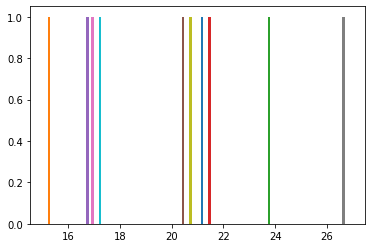

In [49]:
# 直方图操作
# 计算输入张量的直方图。以min和max为range边界，将其均分成bins个直条，然后将排序好的数据划分到各个直条(bins)中
# 如果min和max都为0, 则利用数据中的最大最小值作为边界
x = torch.rand(200)
y = torch.histc(x, min=0, max=1, bins=10)
print(y)
plt.hist(y)
plt.show()

## 矩阵运算

In [50]:
# 对角矩阵
a = torch.rand(2)
print(a)
# diag设置对角矩阵，diagonal等于0，设置主对角线
x = torch.diag(a, diagonal=0)
print(x)
# diagonal大于0，设置主对角线之上diagonal对应位置的值
x = torch.diag(a, diagonal=2)
print(x)
# diagonal小于0，设置主对角线之下diagonal对应位置的值
x = torch.diag(a, diagonal=-1)
print(x)

tensor([0.97456, 0.90584])
tensor([[0.97456, 0.00000],
        [0.00000, 0.90584]])
tensor([[0.00000, 0.00000, 0.97456, 0.00000],
        [0.00000, 0.00000, 0.00000, 0.90584],
        [0.00000, 0.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 0.00000, 0.00000]])
tensor([[0.00000, 0.00000, 0.00000],
        [0.97456, 0.00000, 0.00000],
        [0.00000, 0.90584, 0.00000]])


In [51]:
# 矩阵的迹
# 二维矩阵主对角线上元素之和
x = torch.randn(2, 4)
print(x)
print(torch.trace(x))

tensor([[-0.74642, -0.00769,  0.18950,  0.30077],
        [ 0.33682, -0.10038, -1.25118,  1.92749]])
tensor(-0.84680)


In [52]:
# 下三角矩阵
# 参数diagonal控制对角线: diagonal = 0, 主对角线; diagonal > 0, 主对角线之上; diagonal < 0, 主对角线之下
x = torch.randn(2, 5)
print(torch.tril(x))
print(torch.tril(x, diagonal=2))
print(torch.tril(x, diagonal=-1))
# 上三角矩阵
# 参数diagonal控制对角线: diagonal = 0, 主对角线; diagonal > 0, 主对角线之上; diagonal < 0, 主对角线之下
print(torch.triu(x))
print(torch.triu(x, diagonal=4))
print(torch.triu(x, diagonal=-1))  # ???

tensor([[2.29483, 0.00000, 0.00000, 0.00000, 0.00000],
        [0.59429, 0.77377, 0.00000, 0.00000, 0.00000]])
tensor([[ 2.29483, -0.24912,  0.41962,  0.00000,  0.00000],
        [ 0.59429,  0.77377, -1.08128, -0.68329,  0.00000]])
tensor([[0.00000, 0.00000, 0.00000, 0.00000, 0.00000],
        [0.59429, 0.00000, 0.00000, 0.00000, 0.00000]])
tensor([[ 2.29483, -0.24912,  0.41962,  1.26282,  1.26117],
        [ 0.00000,  0.77377, -1.08128, -0.68329,  0.04989]])
tensor([[0.00000, 0.00000, 0.00000, 0.00000, 1.26117],
        [0.00000, 0.00000, 0.00000, 0.00000, 0.00000]])
tensor([[ 2.29483, -0.24912,  0.41962,  1.26282,  1.26117],
        [ 0.59429,  0.77377, -1.08128, -0.68329,  0.04989]])


In [53]:
# bmm矩阵乘积
# 矩阵A的列数需等于矩阵B的行数
# 1*2*3
x = torch.Tensor([[[1, 2, 3], [4, 5, 6]]])
print(x.shape)
# 1*3*1
y = torch.Tensor([[[9], [8], [7]]])
print(y.shape)
# res 1*2*1
print(torch.bmm(x, y), torch.bmm(x, y).squeeze(0).squeeze(1))
# 注意和mm的区别，bmm为batch matrix multiplication，而mm为matrix multiplication
print(torch.mm(x.squeeze(0), y.squeeze(0)))
# 计算两个一维张量的点积torch.dot，两个向量对应位置的元素相乘再相加
x = torch.Tensor([1, 2, 3, 4])
y = torch.Tensor([4, 3, 2, 1])
print(torch.dot(x, y))

torch.Size([1, 2, 3])
torch.Size([1, 3, 1])
tensor([[[ 46.],
         [118.]]]) tensor([ 46., 118.])
tensor([[ 46.],
        [118.]])
tensor(20.)


In [54]:
# 矩阵相乘再相加
# addmm方法用于两个矩阵相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵乘积结果系数
# 两个相乘的矩阵维度为2，分别表示[width，length]，第一个矩阵的length应该等于第二个矩阵的width满足矩阵相乘条件
# out = (beta*M) + (alpha*mat1·mat2)
x = torch.Tensor([[1, 2]])
print(x.shape)
# batch1: 1*1*3
batch1 = torch.Tensor([[1, 2, 3]])
print(batch1.shape)
# batch2: 1*3*2
batch2 = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(batch2.shape)
print(torch.addmm(x, batch1, batch2, beta=0.1, alpha=5))

torch.Size([1, 2])
torch.Size([1, 3])
torch.Size([3, 2])
tensor([[110.10000, 140.20000]])


In [55]:
# 批矩阵相乘再相加
# addbmm方法用于批矩阵相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵乘积结果系数
# 两个相乘的矩阵维度为3，分别表示[batchsize,width，length]，第一个矩阵的length应该等于第二个矩阵的width满足矩阵相乘条件
# 两个相乘矩阵batchsize应该相等
# res = (beta*M) + (alpha*sum(batch1i·batch2i, i=0, b))
x = torch.Tensor([[1, 2]])
print(x.shape)
# batch1: 1*1*3
batch1 = torch.Tensor([[[1, 2, 3]]])
print(batch1.shape)
# batch2: 1*3*2
batch2 = torch.Tensor([[[1, 2], [3, 4], [5, 6]]])
print(batch2.shape)
print(torch.addbmm(x, batch1, batch2, beta=0.1, alpha=10))

torch.Size([1, 2])
torch.Size([1, 1, 3])
torch.Size([1, 3, 2])
tensor([[220.10000, 280.20000]])


In [56]:
c = torch.bmm(batch1, batch2)
print(c.shape)
sum(c).shape

torch.Size([1, 1, 2])


torch.Size([1, 2])

In [57]:
# 矩阵乘向量再相加
# addmv方法用于矩阵和向量相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵同向量乘积结果
# 矩阵的列应该等于向量长度以满足相乘条件
# out = (beta*tensor) + (alpha*(mat·vec))
# 1*3
x = torch.Tensor([1, 2, 3])
print(x.shape)
# batch1: 1*3
mat = torch.Tensor([[1], [2], [3]])
print(mat.shape)
# batch2:
vec = torch.Tensor([3])
print(vec.shape)
print(torch.addmv(x, mat, vec, beta=100, alpha=10))

torch.Size([3])
torch.Size([3, 1])
torch.Size([1])
tensor([130., 260., 390.])


In [58]:
print(torch.mv(mat, vec))
print(torch.mv(mat, vec).shape)

tensor([3., 6., 9.])
torch.Size([3])


In [59]:
# 计算方阵的特征值和特征向量(eigenvector)
# eigenvectors(bool)如果为True，则同时计算特征值和特征向量，否则只计算特征值
x = torch.Tensor([[9, 2, 3], [4, 5, 8], [7, 10, 9]])
print(torch.eig(x))
print(torch.eig(x, eigenvectors=True))

torch.return_types.eig(
eigenvalues=tensor([[19.02208,  0.00000],
        [ 6.18709,  0.00000],
        [-2.20917,  0.00000]]),
eigenvectors=tensor([]))
torch.return_types.eig(
eigenvalues=tensor([[19.02208,  0.00000],
        [ 6.18709,  0.00000],
        [-2.20917,  0.00000]]),
eigenvectors=tensor([[ 0.33846,  0.78463, -0.05279],
        [ 0.53729, -0.42130, -0.72857],
        [ 0.77251, -0.45483,  0.68294]]))


## 广播机制

In [60]:
# 每个维度的大小都相等，不需要广播即可参与正常的运算
x = torch.ones(1, 2, 3)
y = torch.zeros(1, 2, 3)
print((x+y).shape)

torch.Size([1, 2, 3])


In [61]:
# 每个tensor至少有一个维度
x = torch.Tensor([2])
y = torch.Tensor([[3], [5]])
# x将自动扩展为[[2], [2]]，然后参与计算
print(x+y)

tensor([[5.],
        [7.]])


In [62]:
# 满足tensor的“维度三条件”
# 从最里面的维度开始遍历，要么维度大小相等，要么其中一个维度大小为1，要么其中一个维度缺失，三者满足其一便可自动广播
# 1楼：7==7相等
# 2楼：其中一个size==1
# 3楼：其中一个size==1
# 4楼：4==4相等
# 5楼：3==3相等
# 6楼：其中一个Tensor维度缺失
x = torch.randn(2, 3, 4, 5, 6, 7)
y = torch.rand(3, 4, 1, 1, 7)
print((x+y).shape)
# 下面的Tensor不能广播，因此不能正常参与运算
a = torch.randn(2, 3, 4, 5, 6, 7)
b = torch.rand(3, 4, 1, 2, 7)
print((a+b))

torch.Size([2, 3, 4, 5, 6, 7])


RuntimeError: The size of tensor a (6) must match the size of tensor b (2) at non-singleton dimension 4

## 广播计算规则

In [63]:
# 2*3
x = torch.randn(2, 3)
print(x.shape)

torch.Size([2, 3])


In [64]:
# 1*4*2*3
y = torch.rand(1, 4, 2, 3)
print(y.shape)
# x维度为2，y的维度为4，因此会在x外增加大小为1的维度，变成[[[[1, 2, 3], [1, 2, 3]]]]
# 维度相等后对应维度按照“广播规则”进行广播，使对应维度大小相等
# 输出结果：维度等于高维度Tensor的维度，每个维度大小取两个Tensor对应维度的最大值
print((x+y).shape)

torch.Size([1, 4, 2, 3])
torch.Size([1, 4, 2, 3])


## GPU设备及并行编程

In [65]:
# 使用torch.device指定设备，PyTorch默认使用CPU设备
print("Default Device: {}".format(torch.Tensor([4, 5, 6]).device))

# CPU设备可以使用"cpu:0"来指定
device = torch.Tensor([1, 2, 3], device="cpu:0").device
print("Device Type: {}".format(device))

# 用torch.device指定cpu:0设备
cpu1 = torch.device("cpu:0")
print("CPU Device: 【{}:{}】".format(cpu1.type, cpu1.index))

# 使用索引的方式，默认使用CUDA设备
gpu = torch.device(0)
print("GPU Device: 【{}:{}】".format(gpu.type, gpu.index))

# 也可以通过torch.device("cuda:0")的方式指定使用哪块GPU
gpu = torch.device("cuda:0")
print("GPU Device: 【{}:{}】".format(gpu.type, gpu.index))

# 查看所有可用的GPU设备的个数
print("Total GPU Count: {}".format(torch.cuda.device_count()))

# 获取系统CPU设备的数量
print("Total CPU Count: {}".format(torch.cuda.os.cpu_count()))

# 获取GPU设备的名称
print(torch.cuda.get_device_name(torch.device("cuda:0")))

# GPU设备是否可用
print("GPU Is Available: {}".format(torch.cuda.is_available()))

Default Device: cpu
Device Type: cpu
CPU Device: 【cpu:0】
GPU Device: 【cuda:0】
GPU Device: 【cuda:0】
Total GPU Count: 1
Total CPU Count: 16
GeForce RTX 2080 Ti
GPU Is Available: True


### 将Tensor从CPU转移到GPU并进行计算

In [66]:
# torch.Tensor方法默认使用CPU设备
cpu_tensor = torch.Tensor([[1, 4, 7], [3, 6, 9], [2, 5, 8]])
print(cpu_tensor.device)

# 使用to()方法将cup_tensor转到GPU上
gpu_tensor1 = cpu_tensor.to(torch.device("cuda:0"))
print(gpu_tensor1.device)

# 使用cuda方法将cpu_tensor转移到GPU设备上
gpu_tensor2 = cpu_tensor.cuda(torch.device("cuda:0"))
print(gpu_tensor2.device)

# 使用copy_方法将cpu_tensor转移到GPU设备上
gpu_tensor3 = torch.ones((3, 3), device=torch.device("cuda:0"))
print(gpu_tensor3)
gpu_tensor3.copy_(cpu_tensor)
print(gpu_tensor3.device)
print(gpu_tensor3)

cpu
cuda:0
cuda:0
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
cuda:0
tensor([[1., 4., 7.],
        [3., 6., 9.],
        [2., 5., 8.]], device='cuda:0')


### 直接在GPU设备上创建Tensor

In [67]:
# 使用torch.tensor方法，需要注意和torch.Tensor的区别，前者可通过device指定GPU设备，而后者只能在CPU设备上创建
gpu_tensor1 = torch.tensor([[2, 5, 8], [1, 4, 7], [3, 6, 9]], device=torch.device("cuda:0"))
print(gpu_tensor1.device)

# torch.Tensor方法的device只能是CPU设备，否则报错。在CPU设备上创建后可以使用copy_、cuda、to等方法转移到GPU设备上
cpu_tensor = torch.Tensor([[2, 5, 8], [1, 4, 7], [3, 6, 9]], device=torch.device("cpu:0"))
print(cpu_tensor.device)

# 除了torch.tensor方法，torch上的其他（如rand、randn等）方法也可以通过device参数指定GPU设备
print(torch.rand((3, 4), device=torch.device("cuda:0")))
print(torch.randn((2, 5), device=torch.device("cuda:0")))

cuda:0
cpu
tensor([[0.40233, 0.39581, 0.71156, 0.44878],
        [0.51772, 0.19462, 0.24883, 0.06506],
        [0.29673, 0.00097, 0.54877, 0.14315]], device='cuda:0')
tensor([[-0.88482,  0.70004, -0.72039,  0.15135,  1.46833],
        [-0.36963,  0.74118, -0.87507,  0.16469,  2.32766]], device='cuda:0')


### CUDA Streams

In [68]:
### 一个错误的示例
cuda = torch.device("cuda:0")
# 创建新的Stream
s = torch.cuda.Stream()
# 使用默认Stream
A = torch.randn((1, 10), device=cuda)
print("Current Stream:{}".format(torch.cuda.current_stream()))
for i in range(10):
    # 在新的Stream上对默认Stream上创建的Tensor求和
    with torch.cuda.stream(s):
        print("Current Stream: {}".format(torch.cuda.current_stream()))
        # sum() may start execution before randn() finishes!
        B = torch.sum(A)

Current Stream:<torch.cuda.Stream device=cuda:0 cuda_stream=0x0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x7b62d8f0>


In [69]:
# 使用Synchronize同步方法纠正上面的错误代码
s = torch.cuda.Stream()
A = torch.randn((1000, 700), device=cuda)
default_stream = torch.cuda.current_stream()
print("Defaul Stream: {}".format(default_stream))
# 等待创建A的Stream完成
torch.cuda.Stream.synchronize(default_stream)
# 在新的Stream上对默认Stream上创建的Tensor求和
with torch.cuda.stream(s):
    for i in range(5):
        print("Current Stream: {}".format(torch.cuda.current_stream()))
        B = torch.sum(A)

Defaul Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x5b8dfc0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x5b8dfc0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x5b8dfc0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x5b8dfc0>
Current Stream: <torch.cuda.Stream device=cuda:0 cuda_stream=0x5b8dfc0>


In [70]:
# 释放没有使用的缓存数据
torch.cuda.empty_cache()

In [71]:
# 获取缓存数据大小
torch.cuda.memory_reserved()

25165824

In [72]:
# 获取最大缓存大小
torch.cuda.max_memory_reserved()

27262976

In [73]:
# 最大分配内存大小
torch.cuda.max_memory_allocated()

5604352

## 固定缓冲区

In [74]:
# 通过调用torch.pin_memory方法将Tensor复制到固定缓冲区
x = torch.Tensor([[1, 2, 4], [5, 7, 9], [3, 7, 10]])
y = torch.pinverse(x)
# 或在Tensor上直接调用pin_memory方法
z = x.pin_memory()
# 需要注意的是，pin_memory方法返回Tensor对象的拷贝，因此内存地质是不一样的
print("id: {}".format(id(x)))
print("id: {}".format(id(y)))
print("id: {}".format(id(z)))
# 一旦将Tensor放入固定缓冲区，就可以使用asynchrinize方式将数据复制到GPU设备上，
# 如使用cuda方法，将关键字参数non_blocking设置为True
a = z.cuda(non_blocking=True)
print(a.device)
print(a)
print("is_pinned : {}/{}".format(x.is_pinned(), z.is_pinned()))  # 判断Tensor是否被复制到固定缓冲区

id: 140527432742272
id: 140527759524480
id: 140527432946304
cuda:0
tensor([[ 1.,  2.,  4.],
        [ 5.,  7.,  9.],
        [ 3.,  7., 10.]], device='cuda:0')
is_pinned : False/True


In [75]:
# 在数据加载器Dataloader中指定pin_memory关键字参数为True
# 创建Dataset实例
mnist_dataset = datasets.MNIST('./pytorch_dataset/', train=True, download=True, 
                               transform=Compose([ToTensor(), Normalize((0.1,), (0.3,))]))
data_loader = DataLoader(mnist_dataset, batch_size=32, shuffle=True, num_workers=10, **{"pin_memory": True})

# Dataloader是可以迭代的，使用for循环便可以不断输出数据，使用to方法可以将迭代产生的Tensor发送到GPU设备上
for data, indx in data_loader:
    # print(data[0].is_pinned(), indx.is_pinned())
    # 将数据复制到GPU设备上
    data.to(torch.device("cuda:0"))
    indx.to(torch.device("cuda:0"))

## 自动设备感知

In [76]:
# 创建默认的CPU设备
device = torch.device("cpu:0")

# 如果GPU设备可用，则将默认设备改为GPU
if torch.cuda.is_available():
    device = torch.device("cuda:0")

# 使用torch.tensor方法、关键字参数device指定设备
a = torch.tensor([1, 2, 3], device=device)
print(a)

tensor([1, 2, 3], device='cuda:0')


In [77]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
    
    
regression = LinearRegression().to(device=device)
for para in regression.parameters():
    print(para)

Parameter containing:
tensor([[-0.59592]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.24814], device='cuda:0', requires_grad=True)


## 并发编程

In [78]:
import os
import torch.multiprocessing as mp


def foo(q):  # 将队列对象传递给函数
    pid = os.getpid()
    q.put('my pid is: {}'.format(pid))
    print(pid)
    
    
if __name__ == '__main__':
    # 设置启动进程方式，Windows环境中默认为spawn，Linux环境中默认为fork
    # mp.set_start_method('spawn')
    # 创建队列对象
    q = mp.Queue()
    ps = []
    # 创建10个进程，传递运行函数和参数
    [ps.append(mp.Process(target=foo, args=(q,))) for i in range(10)]
    # 启动进程
    [p.start() for p in ps]
    # join()方法可以使主线程阻塞，等待子线程执行完成再执行
    [p.join for p in ps]
    # 获取队列数据
    data = q.get()
    while data:
        print(data)
        data = q.get()
        if q.empty():
            print(data)
            data = None

10708
10712
10718
10724
10730
10736
10742
10748
my pid is: 10708
my pid is: 10712
my pid is: 10718
my pid is: 10724
my pid is: 10730
my pid is: 10736
my pid is: 10742
my pid is: 10748
my pid is: 10754
10754
10760


In [79]:
def train(x_train, y_train, model):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(),0.001)        
    #开始训练
    num_epochs = 1000
    for i in range(num_epochs):
        input_data = x_train.unsqueeze(1)
        target = y_train.unsqueeze(1)
        out = model(input_data)
        loss = criterion(out,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("PID: {}, Epoch: [{}/{}], loss: [{:.4f}]".format(os.getpid(), i+1, num_epochs, loss.item()))

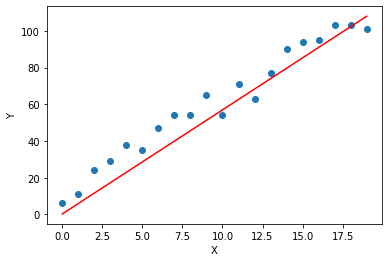

In [80]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(20)
y = np.array([5*x[i]+random.randint(1, 20) for i in range(len(x))])
x_train = torch.from_numpy(x).double()
y_train = torch.from_numpy(y).double()
# 新建模型、误差函数和优化器
model = LinearRegression()
model.share_memory()  # 训练出的权重参数需要多进程共享
processes = []
for rank in range(10):
    p = mp.Process(target=train, args=(x_train, y_train, model))
    p.start()
    processes.append(p)
for p in processes:
    p.join()

# 预测一波
input_data = x_train.unsqueeze(1)
predict = model(input_data)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_train.data.numpy(), predict.squeeze(1).data.numpy(), "r")
plt.scatter(x_train, y_train)
plt.show()

## MNIST手写数字识别

In [81]:
mnist_dataset = datasets.MNIST('./pytorch_dataset/', train=True, download=True, 
                               transform=Compose([ToTensor(), Normalize((0.0,), (1.0,))]))

data_loader = DataLoader(mnist_dataset, batch_size=32, shuffle=True, num_workers=10, **{"pin_memory": True})

In [82]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.layer1 = nn.Linear(784, 50)
        self.layer2 = nn.Linear(50, 10)
        
    def forward(self, x):
        # 输入层到隐藏层，使用tanh激活函数
        x = self.layer1(x.reshape(-1, 784))
        x = torch.tanh(x)
        # 隐藏层到输出层，使用ReLU激活函数
        x = self.layer2(x)
        x = F.relu(x)
        # 使用F.log_softmax激活函数，最后计算损失值时要使用NLLLoss负对数似然损失函数
        x = F.log_softmax(x, dim=1)
        return x

In [83]:
a = torch.Tensor([2, 3, 4])
# 使用PyTorch内置的softmax函数
softmax = a.softmax(dim=0)
print(softmax)
# 根据计算公式
manual_softmax = torch.pow(math.e, a) / torch.pow(math.e, a).sum()
print(manual_softmax)

tensor([0.09003, 0.24473, 0.66524])
tensor([0.09003, 0.24473, 0.66524])


In [84]:
# 使用PyTorch内置的log_softmax函数
log_softmax = a.log_softmax(dim=0)
print(log_softmax)
# 根据计算公式
manual_log_softmax = (torch.pow(math.e, a) / torch.pow(math.e, a).sum()).log()
print(manual_log_softmax)

tensor([-2.40761, -1.40761, -0.40761])
tensor([-2.40761, -1.40761, -0.40761])


In [85]:
print(manual_log_softmax.unsqueeze(1))
# 使用PyTorch内置的nll_loss计算损失，reduction默认为mean，这里为了演示效果设置为none
# LongTensor([0, 0, 0])表示正确类别所在索引，这里只有一个元素，为了方便演示，所以设置成0
nll_loss = F.nll_loss(manual_log_softmax.unsqueeze(1), torch.LongTensor([0, 0, 0]), reduction='none')
print(nll_loss)
# 手动计算nll_loss
# 如果是多类别的
tmp = torch.Tensor([[-2.40761, 4.52], 
                    [-1.40761, 3.42], 
                    [-0.40761, 0.123]])
tmp_index = torch.LongTensor([1, 1, 0])
print("nll_loss: {}".format(F.nll_loss(tmp, tmp_index, reduction='none')))

tensor([[-2.40761],
        [-1.40761],
        [-0.40761]])
tensor([2.40761, 1.40761, 0.40761])
nll_loss: tensor([-4.52000, -3.42000,  0.40761])


In [86]:
# 交叉熵损失函数
b = torch.Tensor([[1, 2], [0.5, 3], [0.9, 4]])
loss = nn.CrossEntropyLoss()
loss(b, torch.LongTensor([0, 1, 0]))

tensor(1.51207)

In [87]:
x = torch.Tensor([[1, 2], [0.5, 3], [0.9, 4]])
label = torch.LongTensor([0, 1, 0])
softmax = x.softmax(dim=1)
print(softmax)

log = softmax.log()
print(log)

# softmax和log其实可以合并为一步：
log_softmax = x.log_softmax(dim=1)
print(log_softmax)

# CrossEntropy等价于nll_loss(log_softmax)等价于nll_loss(log(softmax))
F.nll_loss(log, label)

tensor([[0.26894, 0.73106],
        [0.07586, 0.92414],
        [0.04311, 0.95689]])
tensor([[-1.31326, -0.31326],
        [-2.57889, -0.07889],
        [-3.14406, -0.04406]])
tensor([[-1.31326, -0.31326],
        [-2.57889, -0.07889],
        [-3.14406, -0.04406]])


tensor(1.51207)

In [88]:
parser = argparse.ArgumentParser(description='PyTorch MNIST')
parser.add_argument('--batch-size', type=int, default=64, metavar='N', 
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N', 
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=2, metavar='N', 
                    help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR', 
                    help='learning rate (default: 0.01)')
parser.add_argument('--momentum', type=float, default=0.9, metavar='M', 
                    help='SGD momentum (default: 0.9)')
parser.add_argument('--seed', type=int, default=1, metavar='S', 
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=100, metavar='N', 
                    help='how many batches to wait before logging training status')
parser.add_argument('--num-processes', type=int, default=5, metavar='N', 
                    help='how many training processes to use (default: 5)')
parser.add_argument('--cuda', action='store_true', default=False, 
                    help='enables CUDA training')

_StoreTrueAction(option_strings=['--cuda'], dest='cuda', nargs=0, const=True, default=False, type=None, choices=None, help='enables CUDA training', metavar=None)

In [89]:
parser.print_help()

usage: ipykernel_launcher.py [-h] [--batch-size N] [--test-batch-size N] [--epochs N] [--lr LR] [--momentum M] [--seed S] [--log-interval N] [--num-processes N] [--cuda]

PyTorch MNIST

optional arguments:
  -h, --help           show this help message and exit
  --batch-size N       input batch size for training (default: 64)
  --test-batch-size N  input batch size for testing (default: 1000)
  --epochs N           number of epochs to train (default: 10)
  --lr LR              learning rate (default: 0.01)
  --momentum M         SGD momentum (default: 0.9)
  --seed S             random seed (default: 1)
  --log-interval N     how many batches to wait before logging training status
  --num-processes N    how many training processes to use (default: 5)
  --cuda               enables CUDA training


In [ ]:
def train(rank, args, model, device, dataloader_kwargs):
    # 手动设置随机种子
    torch.manual_seed(args.seed + rank)
    # 加载训练数据
    train_loader = DataLoader(datasets.MNIST('./pytorch_dataset/', train=True, download=True, 
                                             transform=Compose([ToTensor(), Normalize((0.,), (1,))])), 
                              batch_size=args.batch_size, shuffle=True, num_workers=1, **dataloader_kwargs)
    # 使用随机梯度下降进行优化
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    # 开始训练，训练epochs
    for epoch in range(1, args.epochs + 1):
        train_epoch(epoch, args, model, device, train_loader, optimizer)
        
        
def train_epoch(epoch, args, model, device, data_loader, optimizer):
    # 模型转换为训练模式
    model.train()
    pid = os.getpid()
    for batch_idx, (data, target) in enumerate(data_loader):
        # 优化器梯度设置为0
        optimizer.zero_grad()
        # 输入特征预测值
        output = model(data.to(device=device))
        # 用预测值与标准值计算损失
        loss = F.nll_loss(output, target.to(device=device))
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
        # 每100个小批次打印一下日志
        if batch_idx % 100 == 0:
            print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format
                  (pid, epoch, batch_idx * len(data), len(data_loader.dataset), 
                   100. * batch_idx / len(data_loader), loss.item()))
            

def test(args, model, device, dataloader_kwargs):
    # 设置随机种子
    torch.manual_seed(args.seed)
    # 加载测试数据
    test_loader = DataLoader(datasets.MNIST('./pytorch_dataset/', train=False, 
                                            transform=Compose([ToTensor(), Normalize((0.,), (1.,))])), 
                             batch_size=args.test_batch_size, shuffle=True, num_workers=1, 
                             **dataloader_kwargs)
    # 运行测试
    test_epoch(model, device, test_loader)
    
    
def test_epoch(model, device, data_loader):
    # 将模型转换为测试模式
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in data_loader:
            output = model(data.to(device))
            test_loss += F.nll_loss(output, target.to(device), reduction='sum').item()
            # 得到概率最大的索引
            pred = output.max(1)[1]
            # 如果预测的索引和目标索引相同，则认为预测正确
            correct += pred.eq(target.to(device)).sum().item()
    test_loss /= len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
          (test_loss, correct, len(data_loader.dataset), 100. * correct / len(data_loader.dataset)))
    

if __name__ == '__main__':
    # 解析参数
    args = parser.parse_args()
    # 判断是否使用GPU设备
    use_cuda = args.cuda and torch.cuda.is_available()
    # 运行时设备
    device = torch.device("cuda:0" if use_cuda else "cpu:0")
    # 使用固定缓冲区
    dataloader_kwargs = {"pin_memory": True} if use_cuda else {}
    # 多进程训练，Windows环境使用'spawn'
    mp.set_start_method('spawn')
    # 将模型复制到GPU
    model = MNISTNet().to(device=device)
    # 多进程共享模型参数
    model.share_memory()
    processes = []
    for rank in range(args.num_processes):
        p = mp.Process(target=train, args=(rank, args, model, device, dataloader_kwargs))
        p.start()
        processes.append(p)
    for p in processes:
        p.join()  # 使主线程（是主线程还是主进程？？？）阻塞，等待子线程执行完成再执行
    # 测试模型
    test(args, model, device, dataloader_kwargs)

In [90]:
!python3 mnist_classification.py

10865	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313203
10869	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313928
10867	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312402
10866	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319616
10868	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298651
10865	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.333352
10868	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.199292
10867	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.216352
10866	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.172152
10869	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.389586
10868	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.196595
10867	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.292793
10865	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.292164
10866	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.122017
10869	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.227576
10868	Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.207654
10867	Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.143153
10866	Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.187303
10869	Train Epoch: 1 [

### 计算f(x)=e^x的10阶麦克劳林展开的近似值

In [91]:
# PyTorch计算f(x)=e^x的10阶麦克劳林展开的近似值
x = torch.Tensor([1, 2, 3])
print("torch.pow:", torch.pow(math.e, x))


# 10阶麦克劳林公式近似计算e^x
def mcLaughlin_ex(x):
    _sum = 1
    for i in range(1, 11):
        _sum += x ** i / math.factorial(i)
    return _sum


print("mcLaughlin_ex:", mcLaughlin_ex(x))
# 由此可知，10阶麦克劳林展开式已经能够很好地近似原函数
# 阶乘惩罚---既能保留低次项对附近点的表达能力，又能避免高次项对低次项的压制，并且不影响高次项对更远趋势的预测能力

torch.pow: tensor([ 2.71828,  7.38906, 20.08554])
mcLaughlin_ex: tensor([ 2.71828,  7.38899, 20.07967])
